# Pandas基础教程 - Series、DataFrame与数据操作

**学习目标**:
1. 掌握Series和DataFrame的创建与操作
2. 学会数据读取与查看
3. 掌握数据索引、选择与筛选
4. 学会数据清洗（缺失值、重复值处理）
5. 掌握分组聚合与数据透视

**预计时间**: 25-30分钟

## 第一部分: 导入库与设置

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

print(f"✅ Pandas版本: {pd.__version__}")
print("🚀 准备开始学习Pandas！")

✅ Pandas版本: 2.3.3
🚀 准备开始学习Pandas！


## 第二部分: Series（一维数据结构）

Series类似带标签的一维数组，可以理解为Excel中的一列。

In [2]:
# 创建Series（从列表）
s1 = pd.Series([10, 20, 30, 40, 50])
print("Series (默认索引):")
print(s1)
print(f"\n数据类型: {s1.dtype}")
print(f"形状: {s1.shape}")

Series (默认索引):
0    10
1    20
2    30
3    40
4    50
dtype: int64

数据类型: int64
形状: (5,)


In [3]:
# 创建Series（自定义索引）
s2 = pd.Series(
    data=[85, 90, 78, 92],
    index=['语文', '数学', '英语', '物理'],
    name='张三的成绩'
)

print("Series (自定义索引):")
print(s2)
print(f"\n访问'数学'成绩: {s2['数学']}")
print(f"平均分: {s2.mean():.2f}")

Series (自定义索引):
语文    85
数学    90
英语    78
物理    92
Name: 张三的成绩, dtype: int64

访问'数学'成绩: 90
平均分: 86.25


In [4]:
# 从字典创建Series
population = pd.Series({
    '北京': 2171,
    '上海': 2424,
    '广州': 1868,
    '深圳': 1756
})

print("城市人口 (万人):")
print(population)
print(f"\n总人口: {population.sum()}万人")
print(f"平均人口: {population.mean():.0f}万人")

城市人口 (万人):
北京    2171
上海    2424
广州    1868
深圳    1756
dtype: int64

总人口: 8219万人
平均人口: 2055万人


## 第三部分: DataFrame（二维数据结构）

DataFrame类似Excel表格或SQL表，是Pandas的核心数据结构。

### 3.1 创建DataFrame

In [5]:
# 从字典创建DataFrame
data = {
    '姓名': ['张三', '李四', '王五', '赵六'],
    '年龄': [25, 30, 28, 35],
    '城市': ['北京', '上海', '广州', '深圳'],
    '薪资': [15000, 20000, 18000, 25000]
}

df = pd.DataFrame(data)
print("员工信息表:")
print(df)

员工信息表:
   姓名  年龄  城市     薪资
0  张三  25  北京  15000
1  李四  30  上海  20000
2  王五  28  广州  18000
3  赵六  35  深圳  25000


In [6]:
# DataFrame基本信息
print("数据形状:", df.shape)
print("\n列名:", df.columns.tolist())
print("\n索引:", df.index.tolist())
print("\n数据类型:\n", df.dtypes)

数据形状: (4, 4)

列名: ['姓名', '年龄', '城市', '薪资']

索引: [0, 1, 2, 3]

数据类型:
 姓名    object
年龄     int64
城市    object
薪资     int64
dtype: object


### 3.2 查看数据

In [7]:
# 创建一个更大的DataFrame用于演示
np.random.seed(42)
df_large = pd.DataFrame({
    '日期': pd.date_range('2024-01-01', periods=100),
    '销售额': np.random.randint(5000, 20000, 100),
    '订单数': np.random.randint(50, 200, 100),
    '客户数': np.random.randint(30, 150, 100)
})

print("查看前5行:")
print(df_large.head())

print("\n查看后5行:")
print(df_large.tail())

print("\n随机抽样5行:")
print(df_large.sample(5))

查看前5行:
          日期    销售额  订单数  客户数
0 2024-01-01  12270  144   31
1 2024-01-02   5860   97   31
2 2024-01-03  10390   64  121
3 2024-01-04  18418   89   83
4 2024-01-05  10191  131  116

查看后5行:
           日期    销售额  订单数  客户数
95 2024-04-05   5161  162   53
96 2024-04-06   9297  150  145
97 2024-04-07  15173  162  104
98 2024-04-08   5995  130  142
99 2024-04-09  19605  162  101

随机抽样5行:
           日期    销售额  订单数  客户数
63 2024-03-04  15233   94   52
11 2024-01-12   9426   94   82
56 2024-02-26  19502   78  133
84 2024-03-25   6021  100  134
99 2024-04-09  19605  162  101


In [8]:
# 数据概览
print("数据信息:")
print(df_large.info())

print("\n描述性统计:")
print(df_large.describe())

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      100 non-null    datetime64[ns]
 1   销售额     100 non-null    int64         
 2   订单数     100 non-null    int64         
 3   客户数     100 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.3 KB
None

描述性统计:
                        日期       销售额     订单数     客户数
count                  100    100.00  100.00  100.00
mean   2024-02-19 12:00:00  12315.17  123.56   86.68
min    2024-01-01 00:00:00   5161.00   50.00   30.00
25%    2024-01-25 18:00:00   8771.25   87.50   52.75
50%    2024-02-19 12:00:00  12391.50  120.50   85.50
75%    2024-03-15 06:00:00  15762.25  162.00  119.50
max    2024-04-09 00:00:00  19737.00  192.00  149.00
std                    NaN   4215.54   42.19   36.74


### 3.3 数据选择与索引

Pandas提供多种选择数据的方式：

In [9]:
# 选择单列（返回Series）
print("选择'姓名'列:")
print(df['姓名'])
print(type(df['姓名']))

# 选择多列（返回DataFrame）
print("\n选择'姓名'和'薪资'列:")
print(df[['姓名', '薪资']])

选择'姓名'列:
0    张三
1    李四
2    王五
3    赵六
Name: 姓名, dtype: object
<class 'pandas.core.series.Series'>

选择'姓名'和'薪资'列:
   姓名     薪资
0  张三  15000
1  李四  20000
2  王五  18000
3  赵六  25000


In [10]:
# 使用loc（按标签索引）
print("使用loc选择第1行:")
print(df.loc[0])

print("\n使用loc选择特定行列:")
print(df.loc[0:2, ['姓名', '城市']])

使用loc选择第1行:
姓名       张三
年龄       25
城市       北京
薪资    15000
Name: 0, dtype: object

使用loc选择特定行列:
   姓名  城市
0  张三  北京
1  李四  上海
2  王五  广州


In [11]:
# 使用iloc（按位置索引）
print("使用iloc选择前2行、前2列:")
print(df.iloc[:2, :2])

print("\n使用iloc选择第2行、第3列:")
print(df.iloc[1, 2])

使用iloc选择前2行、前2列:
   姓名  年龄
0  张三  25
1  李四  30

使用iloc选择第2行、第3列:
上海


In [12]:
# 布尔索引（条件筛选）
print("筛选薪资>18000的员工:")
high_salary = df[df['薪资'] > 18000]
print(high_salary)

print("\n筛选年龄在25-30之间的员工:")
age_filter = df[(df['年龄'] >= 25) & (df['年龄'] <= 30)]
print(age_filter)

筛选薪资>18000的员工:
   姓名  年龄  城市     薪资
1  李四  30  上海  20000
3  赵六  35  深圳  25000

筛选年龄在25-30之间的员工:
   姓名  年龄  城市     薪资
0  张三  25  北京  15000
1  李四  30  上海  20000
2  王五  28  广州  18000


## 第四部分: 数据清洗

### 4.1 处理缺失值

In [13]:
# 创建包含缺失值的DataFrame
data_missing = {
    '姓名': ['张三', '李四', None, '赵六', '钱七'],
    '年龄': [25, None, 28, 35, 30],
    '薪资': [15000, 20000, np.nan, 25000, 22000]
}
df_missing = pd.DataFrame(data_missing)

print("原始数据（含缺失值）:")
print(df_missing)

print("\n检查缺失值:")
print(df_missing.isnull())

print("\n每列缺失值数量:")
print(df_missing.isnull().sum())

原始数据（含缺失值）:
     姓名    年龄       薪资
0    张三  25.0  15000.0
1    李四   NaN  20000.0
2  None  28.0      NaN
3    赵六  35.0  25000.0
4    钱七  30.0  22000.0

检查缺失值:
      姓名     年龄     薪资
0  False  False  False
1  False   True  False
2   True  False   True
3  False  False  False
4  False  False  False

每列缺失值数量:
姓名    1
年龄    1
薪资    1
dtype: int64


In [14]:
# 处理缺失值的方法

# 方法1: 删除含缺失值的行
df_dropped = df_missing.dropna()
print("删除缺失值后:")
print(df_dropped)

# 方法2: 填充缺失值
df_filled = df_missing.copy()
df_filled['年龄'] = df_filled['年龄'].fillna(df_filled['年龄'].mean())
df_filled['薪资'] = df_filled['薪资'].fillna(df_filled['薪资'].median())
df_filled['姓名'] = df_filled['姓名'].fillna('未知')

print("\n填充缺失值后:")
print(df_filled)

删除缺失值后:
   姓名    年龄       薪资
0  张三  25.0  15000.0
3  赵六  35.0  25000.0
4  钱七  30.0  22000.0

填充缺失值后:
   姓名    年龄       薪资
0  张三  25.0  15000.0
1  李四  29.5  20000.0
2  未知  28.0  21000.0
3  赵六  35.0  25000.0
4  钱七  30.0  22000.0


### 4.2 处理重复值

In [15]:
# 创建包含重复值的DataFrame
data_dup = {
    '姓名': ['张三', '李四', '王五', '张三', '赵六'],
    '年龄': [25, 30, 28, 25, 35],
    '城市': ['北京', '上海', '广州', '北京', '深圳']
}
df_dup = pd.DataFrame(data_dup)

print("原始数据（含重复）:")
print(df_dup)

print("\n检查重复行:")
print(df_dup.duplicated())

print(f"\n重复行数量: {df_dup.duplicated().sum()}")

原始数据（含重复）:
   姓名  年龄  城市
0  张三  25  北京
1  李四  30  上海
2  王五  28  广州
3  张三  25  北京
4  赵六  35  深圳

检查重复行:
0    False
1    False
2    False
3     True
4    False
dtype: bool

重复行数量: 1


In [16]:
# 删除重复值
df_no_dup = df_dup.drop_duplicates()
print("删除重复后:")
print(df_no_dup)

# 基于特定列删除重复
df_no_dup_name = df_dup.drop_duplicates(subset=['姓名'], keep='first')
print("\n基于'姓名'列删除重复（保留第一次出现）:")
print(df_no_dup_name)

删除重复后:
   姓名  年龄  城市
0  张三  25  北京
1  李四  30  上海
2  王五  28  广州
4  赵六  35  深圳

基于'姓名'列删除重复（保留第一次出现）:
   姓名  年龄  城市
0  张三  25  北京
1  李四  30  上海
2  王五  28  广州
4  赵六  35  深圳


### 4.3 数据类型转换

In [17]:
# 创建示例数据
df_types = pd.DataFrame({
    '日期': ['2024-01-01', '2024-01-02', '2024-01-03'],
    '销售额': ['15000', '20000', '18000'],
    '数量': [100, 150, 120]
})

print("原始数据类型:")
print(df_types.dtypes)
print("\n原始数据:")
print(df_types)

原始数据类型:
日期     object
销售额    object
数量      int64
dtype: object

原始数据:
           日期    销售额   数量
0  2024-01-01  15000  100
1  2024-01-02  20000  150
2  2024-01-03  18000  120


In [18]:
# 类型转换
df_types['日期'] = pd.to_datetime(df_types['日期'])
df_types['销售额'] = df_types['销售额'].astype(int)

print("转换后的数据类型:")
print(df_types.dtypes)
print("\n转换后的数据:")
print(df_types)

转换后的数据类型:
日期     datetime64[ns]
销售额             int64
数量              int64
dtype: object

转换后的数据:
          日期    销售额   数量
0 2024-01-01  15000  100
1 2024-01-02  20000  150
2 2024-01-03  18000  120


## 第五部分: 数据操作

### 5.1 添加和删除列

In [19]:
# 回到员工信息表
df_emp = df.copy()

# 添加新列（计算列）
df_emp['年薪'] = df_emp['薪资'] * 12
df_emp['税后薪资'] = df_emp['薪资'] * 0.8

print("添加新列后:")
print(df_emp)

# 删除列
df_emp = df_emp.drop('年薪', axis=1)
print("\n删除'年薪'列后:")
print(df_emp)

添加新列后:
   姓名  年龄  城市     薪资      年薪     税后薪资
0  张三  25  北京  15000  180000  12000.0
1  李四  30  上海  20000  240000  16000.0
2  王五  28  广州  18000  216000  14400.0
3  赵六  35  深圳  25000  300000  20000.0

删除'年薪'列后:
   姓名  年龄  城市     薪资     税后薪资
0  张三  25  北京  15000  12000.0
1  李四  30  上海  20000  16000.0
2  王五  28  广州  18000  14400.0
3  赵六  35  深圳  25000  20000.0


### 5.2 排序

In [20]:
# 按薪资降序排序
df_sorted = df.sort_values('薪资', ascending=False)
print("按薪资降序:")
print(df_sorted)

# 按多列排序
df_sorted_multi = df.sort_values(['年龄', '薪资'], ascending=[True, False])
print("\n按年龄升序、薪资降序:")
print(df_sorted_multi)

按薪资降序:
   姓名  年龄  城市     薪资
3  赵六  35  深圳  25000
1  李四  30  上海  20000
2  王五  28  广州  18000
0  张三  25  北京  15000

按年龄升序、薪资降序:
   姓名  年龄  城市     薪资
0  张三  25  北京  15000
2  王五  28  广州  18000
1  李四  30  上海  20000
3  赵六  35  深圳  25000


### 5.3 分组聚合（GroupBy）

GroupBy是Pandas最强大的功能之一，类似SQL的GROUP BY。

In [21]:
# 创建销售数据
sales_data = {
    '日期': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    '产品': ['手机', '电脑', '手机', '平板', '电脑'],
    '销售额': [5000, 8000, 4500, 3000, 7500],
    '数量': [5, 3, 4, 2, 4]
}
df_sales = pd.DataFrame(sales_data)

print("原始销售数据:")
print(df_sales)

原始销售数据:
           日期  产品   销售额  数量
0  2024-01-01  手机  5000   5
1  2024-01-01  电脑  8000   3
2  2024-01-02  手机  4500   4
3  2024-01-02  平板  3000   2
4  2024-01-03  电脑  7500   4


In [22]:
# 按产品分组，计算总销售额
grouped_product = df_sales.groupby('产品')['销售额'].sum()
print("按产品分组的总销售额:")
print(grouped_product)

# 多种聚合函数
grouped_agg = df_sales.groupby('产品').agg({
    '销售额': ['sum', 'mean', 'max'],
    '数量': ['sum', 'mean']
})

print("\n多种聚合统计:")
print(grouped_agg)

按产品分组的总销售额:
产品
平板     3000
手机     9500
电脑    15500
Name: 销售额, dtype: int64

多种聚合统计:
      销售额                数量     
      sum    mean   max sum mean
产品                              
平板   3000  3000.0  3000   2  2.0
手机   9500  4750.0  5000   9  4.5
电脑  15500  7750.0  8000   7  3.5


### 5.4 数据透视表

In [23]:
# 创建更复杂的销售数据
sales_pivot_data = {
    '日期': ['2024-01', '2024-01', '2024-02', '2024-02', '2024-01', '2024-02'],
    '产品': ['手机', '电脑', '手机', '电脑', '手机', '电脑'],
    '地区': ['北京', '北京', '北京', '北京', '上海', '上海'],
    '销售额': [10000, 15000, 12000, 18000, 9000, 16000]
}
df_pivot = pd.DataFrame(sales_pivot_data)

print("原始数据:")
print(df_pivot)

原始数据:
        日期  产品  地区    销售额
0  2024-01  手机  北京  10000
1  2024-01  电脑  北京  15000
2  2024-02  手机  北京  12000
3  2024-02  电脑  北京  18000
4  2024-01  手机  上海   9000
5  2024-02  电脑  上海  16000


In [24]:
# 创建数据透视表
pivot_table = df_pivot.pivot_table(
    values='销售额',
    index='产品',
    columns='地区',
    aggfunc='sum',
    fill_value=0
)

print("数据透视表（产品 × 地区）:")
print(pivot_table)

print("\n添加行列总计:")
print(pivot_table.sum(axis=1))  # 行总计
print(pivot_table.sum(axis=0))  # 列总计

数据透视表（产品 × 地区）:
地区     上海     北京
产品              
手机   9000  22000
电脑  16000  33000

添加行列总计:
产品
手机    31000
电脑    49000
dtype: int64
地区
上海    25000
北京    55000
dtype: int64


## 第六部分: 实战练习

### 练习: 分析电商订单数据

In [25]:
# 生成模拟电商订单数据
np.random.seed(42)
n_orders = 100

orders = pd.DataFrame({
    '订单ID': [f'ORD{i:04d}' for i in range(1, n_orders + 1)],
    '日期': pd.date_range('2024-01-01', periods=n_orders, freq='h'),
    '用户ID': np.random.randint(1001, 1021, n_orders),
    '产品类别': np.random.choice(['电子产品', '服装', '食品', '图书'], n_orders),
    '订单金额': np.random.randint(50, 1000, n_orders),
    '支付状态': np.random.choice(['已支付', '待支付', '已取消'], n_orders, p=[0.7, 0.2, 0.1])
})

print("订单数据（前10条）:")
print(orders.head(10))
print(f"\n总订单数: {len(orders)}")

订单数据（前10条）:
      订单ID                  日期  用户ID  产品类别  订单金额 支付状态
0  ORD0001 2024-01-01 00:00:00  1007    食品   657  待支付
1  ORD0002 2024-01-01 01:00:00  1020    图书   521  已取消
2  ORD0003 2024-01-01 02:00:00  1015    图书   282  已支付
3  ORD0004 2024-01-01 03:00:00  1011    服装   741  已支付
4  ORD0005 2024-01-01 04:00:00  1008    食品   162  已支付
5  ORD0006 2024-01-01 05:00:00  1007    食品   879  待支付
6  ORD0007 2024-01-01 06:00:00  1019  电子产品   546  待支付
7  ORD0008 2024-01-01 07:00:00  1011    食品   491  待支付
8  ORD0009 2024-01-01 08:00:00  1011  电子产品   613  待支付
9  ORD0010 2024-01-01 09:00:00  1004    食品   317  已支付

总订单数: 100


In [26]:
# TODO: 完成以下分析任务

# 1. 筛选已支付的订单
paid_orders = orders[orders['支付状态'] == '已支付']
print(f"1. 已支付订单数: {len(paid_orders)}")

# 2. 计算总销售额（仅已支付）
total_sales = paid_orders['订单金额'].sum()
print(f"2. 总销售额: ¥{total_sales:,}")

# 3. 按产品类别统计销售额
sales_by_category = paid_orders.groupby('产品类别')['订单金额'].agg(['sum', 'mean', 'count'])
print("\n3. 按产品类别统计:")
print(sales_by_category)

# 4. 找出消费最高的用户
top_users = paid_orders.groupby('用户ID')['订单金额'].sum().sort_values(ascending=False).head(5)
print("\n4. 消费TOP5用户:")
print(top_users)

# 5. 计算平均订单金额
avg_order_value = paid_orders['订单金额'].mean()
print(f"\n5. 平均订单金额: ¥{avg_order_value:.2f}")

# 6. 按日期统计每天的订单数
orders['日期'] = pd.to_datetime(orders['日期'])
orders['日期_仅日期'] = orders['日期'].dt.date
daily_orders = orders.groupby('日期_仅日期').size()
print("\n6. 每日订单数（前5天）:")
print(daily_orders.head())

1. 已支付订单数: 65
2. 总销售额: ¥35,225

3. 按产品类别统计:
        sum    mean  count
产品类别                      
图书     8667  577.80     15
服装     7979  569.93     14
电子产品   5310  482.73     11
食品    13269  530.76     25

4. 消费TOP5用户:
用户ID
1008    4052
1012    3201
1001    3198
1004    3142
1009    2417
Name: 订单金额, dtype: int64

5. 平均订单金额: ¥541.92

6. 每日订单数（前5天）:
日期_仅日期
2024-01-01    24
2024-01-02    24
2024-01-03    24
2024-01-04    24
2024-01-05     4
dtype: int64


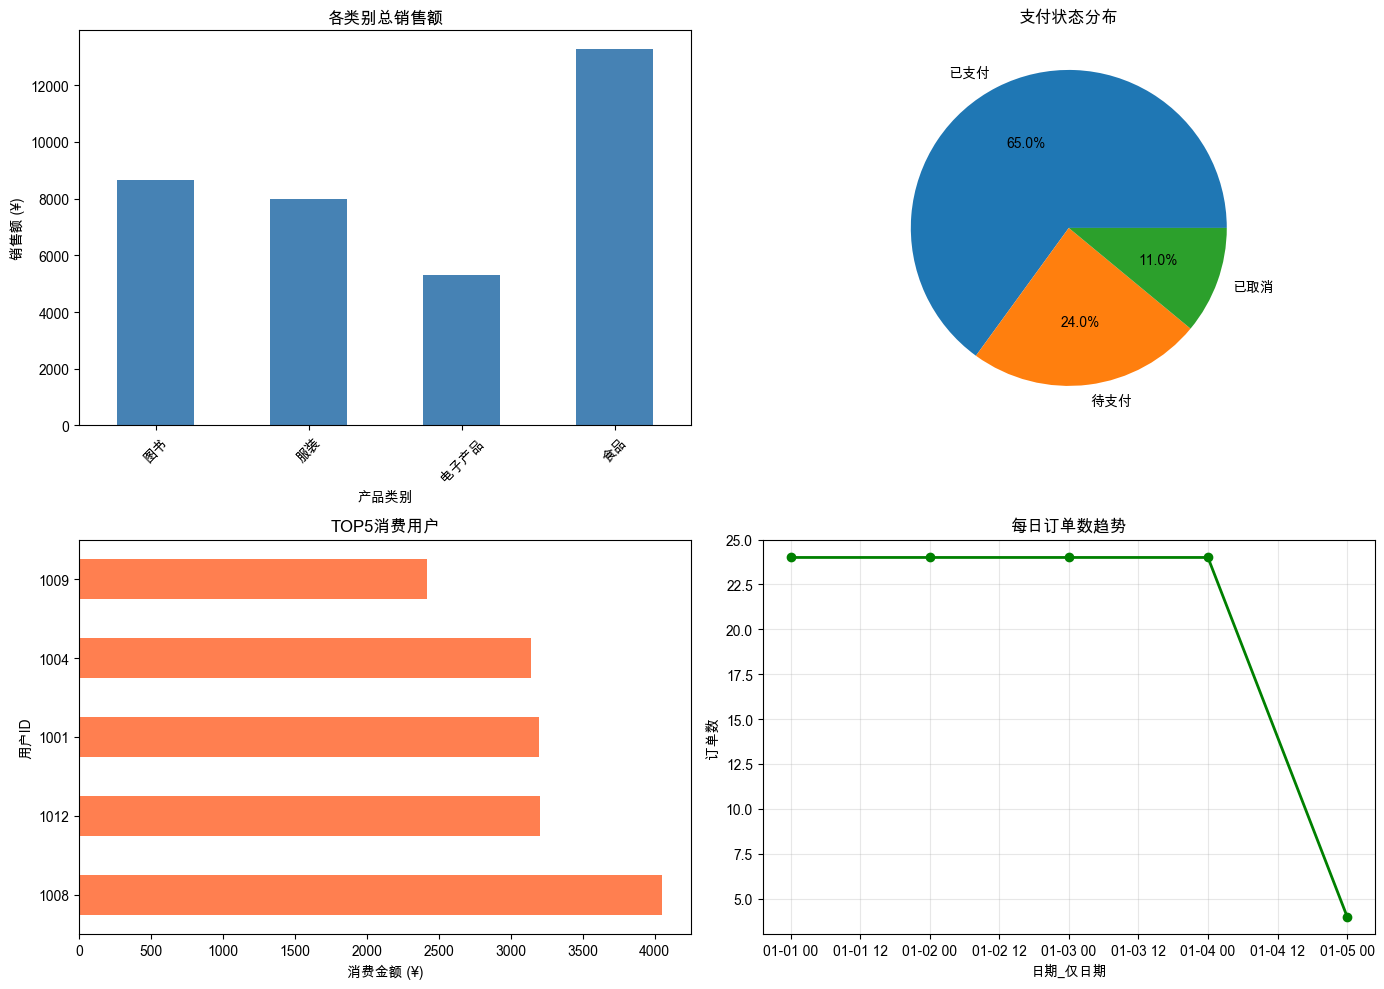

In [28]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
# 可视化分析结果
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 子图1: 产品类别销售额
sales_by_category['sum'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('各类别总销售额', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('销售额 (¥)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 子图2: 支付状态分布
orders['支付状态'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%')
axes[0, 1].set_title('支付状态分布', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# 子图3: TOP5用户消费
top_users.plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('TOP5消费用户', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('消费金额 (¥)')

# 子图4: 每日订单趋势
daily_orders.plot(ax=axes[1, 1], marker='o', color='green', linewidth=2)
axes[1, 1].set_title('每日订单数趋势', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('订单数')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 总结与要点

### 核心知识点回顾

1. **Series与DataFrame**:
   - Series: 一维带标签数组
   - DataFrame: 二维表格数据
   - 创建方式: 从字典、列表、NumPy数组

2. **数据选择**:
   - `df['列名']`: 选择列
   - `df.loc[]`: 按标签索引
   - `df.iloc[]`: 按位置索引
   - 布尔索引: `df[df['列'] > 值]`

3. **数据清洗**:
   - 缺失值: `isnull()`, `dropna()`, `fillna()`
   - 重复值: `duplicated()`, `drop_duplicates()`
   - 类型转换: `astype()`, `pd.to_datetime()`

4. **数据操作**:
   - 添加/删除列
   - 排序: `sort_values()`
   - 分组: `groupby()` + `agg()`
   - 透视表: `pivot_table()`

5. **性能技巧**:
   - 使用向量化操作，避免循环
   - 使用Parquet格式读写大文件
   - 合理使用数据类型节省内存

### 下一步学习

- ✅ 完成练习题
- 📚 继续学习 [03-visualization.ipynb](./03-visualization.ipynb)
- 🚀 应用到实际项目中

**恭喜完成Pandas基础教程！** 🎉

Pandas是数据分析的核心工具，多练习、多实践，你会越用越顺手！